In [12]:
import os
import pandas as pd
from sklearn.mixture import GaussianMixture

# Set variabel lingkungan OMP_NUM_THREADS sebelum menjalankan GMM
os.environ['OMP_NUM_THREADS'] = '2'

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')

# Pilih kolom yang akan digunakan untuk clustering
X = data[['age', 'trtbps', 'chol', 'thalachh']]

# Mengambil data ke-166 dan ke-302 sebagai pusat atau acuan untuk klaster
acuan_1 = X.iloc[165]  # Data ke-166 (indeks dimulai dari 0)
acuan_2 = X.iloc[302]  # Data ke-302 (indeks dimulai dari 0)

# Inisialisasi pusat klaster menggunakan data ke-166 dan ke-302
centers = pd.concat([acuan_1, acuan_2], axis=1).T

# Inisialisasi dan melatih model GMM dengan pusat yang telah ditentukan
gmm = GaussianMixture(n_components=2, means_init=centers, n_init=1)
gmm.fit(X)

# Mendapatkan label klaster untuk setiap sampel
labels_gmm = gmm.predict(X)

# Menambahkan kolom label ke dataframe asli
data['cluster_label_gmm'] = labels_gmm

# Menampilkan hasil clustering
print(data[['age', 'trtbps', 'chol', 'thalachh', 'cluster_label_gmm']])


     age  trtbps  chol  thalachh  cluster_label_gmm
0     63     145   233       150                  1
1     37     130   250       187                  1
2     41     130   204       172                  1
3     56     120   236       178                  1
4     57     120   354       163                  0
..   ...     ...   ...       ...                ...
298   57     140   241       123                  0
299   45     110   264       132                  1
300   68     144   193       141                  1
301   57     130   131       115                  0
302   57     130   236       174                  1

[303 rows x 5 columns]


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [13]:
data_baru = pd.DataFrame({'age': [2.3], 'trtbps': [33], 'chol': [3.3], 'thalachh': [4.2]})

# Melakukan prediksi untuk data baru menggunakan model GMM
prediksi_gmm = gmm.predict(data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi GMM:", prediksi_gmm)

Hasil prediksi GMM: [0]


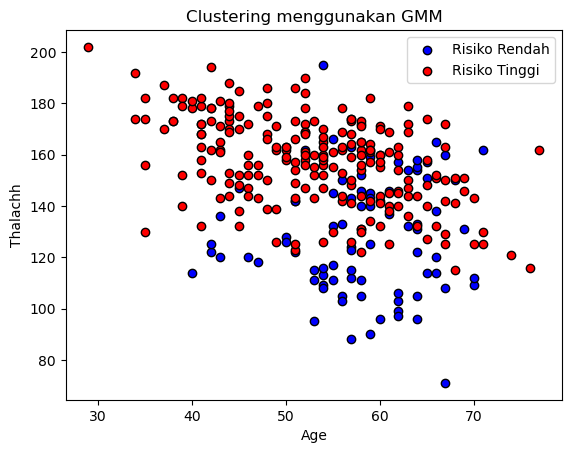

In [14]:
import matplotlib.pyplot as plt

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X)

# Menambahkan kolom 'cluster_gmm' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0_gmm['age'], cluster_0_gmm['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['age'], cluster_1_gmm['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan GMM')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()


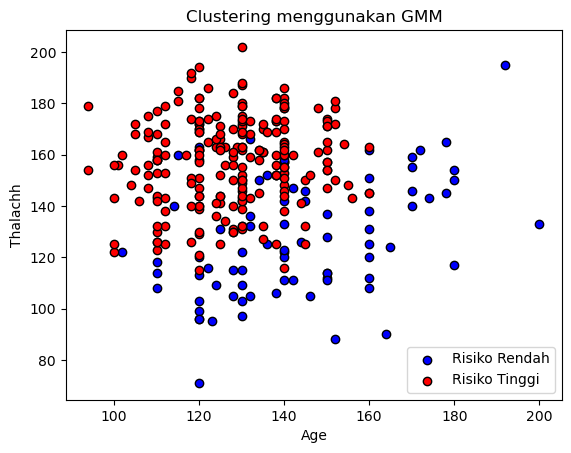

In [15]:
import matplotlib.pyplot as plt

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X)

# Menambahkan kolom 'cluster_gmm' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0_gmm['trtbps'], cluster_0_gmm['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['trtbps'], cluster_1_gmm['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan GMM')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()


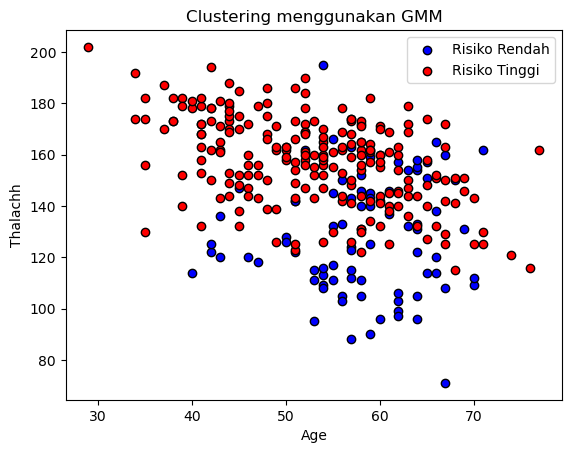

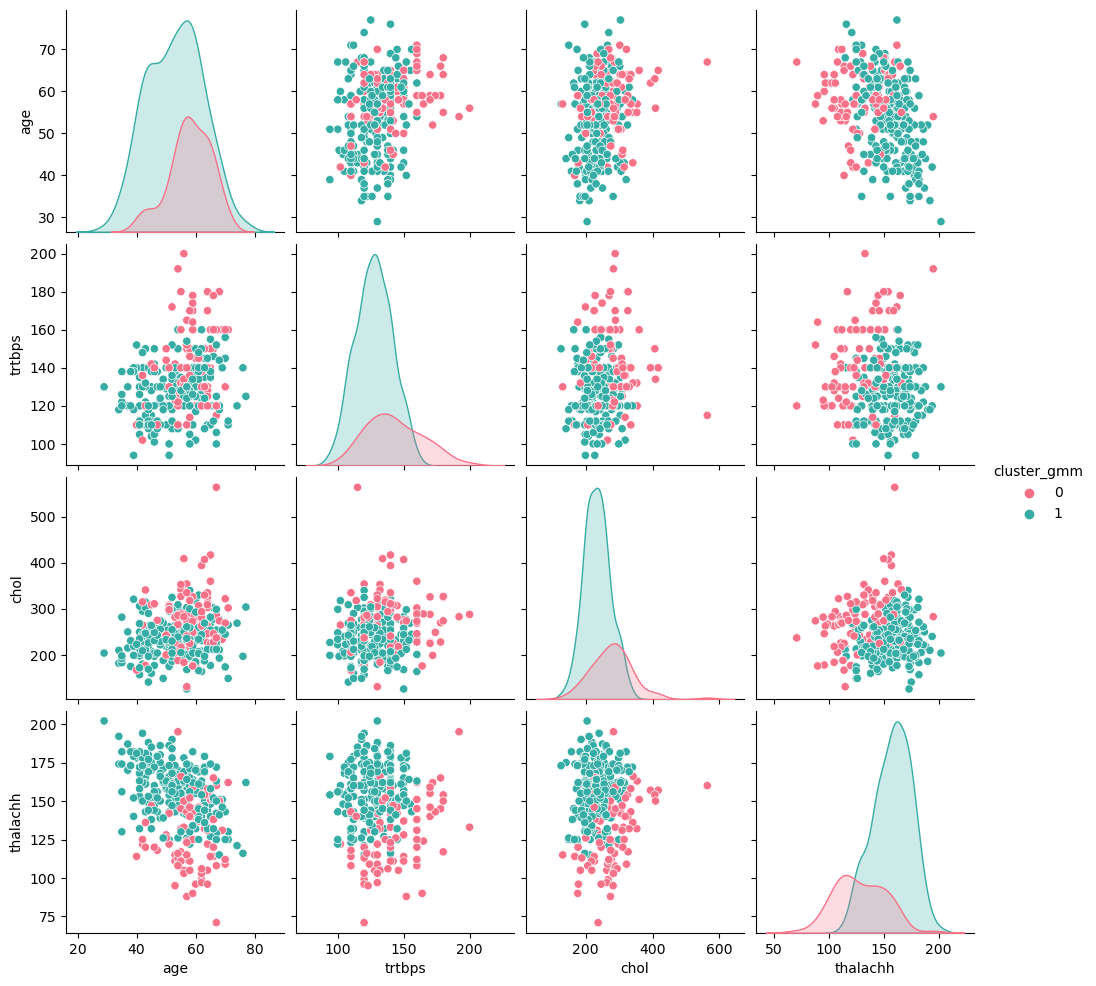

In [16]:
import seaborn as sns

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X)

# Menambahkan kolom 'cluster_gmm' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Risiko Rendah', 1: 'Risiko Tinggi'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Scatter plot untuk visualisasi klaster menggunakan K-Means
plt.scatter(cluster_0_gmm['age'], cluster_0_gmm['thalachh'], label='Risiko Rendah', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['age'], cluster_1_gmm['thalachh'], label='Risiko Tinggi', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan GMM')
plt.xlabel('Age')
plt.ylabel('Thalachh')

plt.legend()
plt.show()

# Pair plot untuk visualisasi fitur-fitur dalam satu plot menggunakan GMM
sns.pairplot(data[['age', 'trtbps', 'chol', 'thalachh', 'cluster_gmm']], hue='cluster_gmm', palette='husl')
plt.show()
